<h1>Projet MAchine Learning & Deep Learning</h1>

Le sujet : Detecting malicious URLs

Membres de groupe : 
<ul>
    <li>AGOULZI Imane</li>
    <li>AMELLALN Ayoub</li>
    <li>EL BERDAI Adam</li>
    <li>JOUIJATE Rim</li>
</ul>
<br>Filière : SSI 
<br>Professeur : BENBRAHIM Houda
<br>Année universitaire 2022-2023

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [5]:
df = pd.read_csv("urldata.csv")

In [6]:
df.head() #les premiers éléments du tableau de données

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [7]:
#on supprime les attributs qui n'apportent pas d'infos nécessaires
df = df.drop('Unnamed: 0',axis=1)

In [8]:
#le nombre d'exemples et le nombre d'attributs
df.shape

(450176, 3)

In [9]:
#les informations sur notre dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


In [10]:
#tester s'il y a de valeurs manquantes
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

cela montre qui'l n'y a pas de valeurs manquantes

<h2>1 - DATA PREPROCESSING</h2>

On va extraire de chaque URL les attributs suivants :
<br>En premier lieu, (des entiers)
  <ul>
  <li>la longueur d'URL</li>
  <li>la longueur du Hostname</li>
  <li>la longueur du path</li>
  <li>la longueur du First Directory</li> 
  </ul>
<br>En deuxième lieu, (des entiers)
  <ul>
  <li>nombre de '-'</li>
  <li>nombre de '@'</li>
  <li>nombre de '?'</li>
  <li>nombre de '.'</li>
  <li>nombre de '%'</li>
  <li>nombre de '='</li>
  <li>nombre de 'http'</li>
  <li>nombre de chiffres</li>
  <li>nombre de Lettres</li>
  <li>nombre de Directories</li>
  </ul>
<br>En troisième lieu, (attributs binaires)
  <ul>
  <li>l'utilisation ou non de IP</li>
  <li>l'utilisation ou non de Shortening URL</li>
  </ul>

***1/ le premier groupe d'attributs***

In [11]:
!pip install tld

In [12]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [13]:
#longueur d'URL
df['longueur_url'] = df['url'].apply(lambda i: len(str(i)))

In [14]:
#la longueur du Hostname
df['longueur_hostname'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

In [15]:
#la longueur du path
df['longueur_path'] = df['url'].apply(lambda i: len(urlparse(i).path))

In [16]:
#la longueur du First Directory
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['longueur_fd'] = df['url'].apply(lambda i: fd_length(i))

In [17]:
#la longueur du Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['longueur_tld'] = df['tld'].apply(lambda i: tld_length(i))

In [18]:
#revoir les premiers lignes de données après l'extraction des nouveaux attributs
df.head()

,url,label,result,longueur_url,longueur_hostname,longueur_path,longueur_fd,tld,longueur_tld
0,https://www.google.com,benign,0,22,14,0,0,com,3
1,https://www.youtube.com,benign,0,23,15,0,0,com,3
2,https://www.facebook.com,benign,0,24,16,0,0,com,3
3,https://www.baidu.com,benign,0,21,13,0,0,com,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,org,3


In [19]:
df = df.drop("tld",1)

C:\Users\HP\AppData\Local\Temp\ipykernel_20300\2551734815.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("tld",1)


In [20]:
df.head()

,url,label,result,longueur_url,longueur_hostname,longueur_path,longueur_fd,longueur_tld
0,https://www.google.com,benign,0,22,14,0,0,3
1,https://www.youtube.com,benign,0,23,15,0,0,3
2,https://www.facebook.com,benign,0,24,16,0,0,3
3,https://www.baidu.com,benign,0,21,13,0,0,3
4,https://www.wikipedia.org,benign,0,25,17,0,0,3


***2/ le deuxième groupe d'attributs***

In [21]:
#nombre de '-'
df['nb-'] = df['url'].apply(lambda i: i.count('-'))

In [22]:
#nombre de '@'
df['nb@'] = df['url'].apply(lambda i: i.count('@'))

In [23]:
#nombre de '?'
df['nb?'] = df['url'].apply(lambda i: i.count('?'))

In [24]:
#nombre de '.'
df['nb.'] = df['url'].apply(lambda i: i.count('.'))

In [25]:
#nombre de '%'
df['nb%'] = df['url'].apply(lambda i: i.count('%'))

In [26]:
#nombre de '='
df['nb='] = df['url'].apply(lambda i: i.count('='))

In [27]:
#nombre de 'http'
df['nb-http'] = df['url'].apply(lambda i : i.count('http'))
#nombre de 'https'
df['nb-https'] = df['url'].apply(lambda i : i.count('https'))

In [28]:
#nombre de 'www'
df['nb-www'] = df['url'].apply(lambda i: i.count('www'))

In [29]:
#nombre de chiffres
def chiffres_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['nb-chiffres']= df['url'].apply(lambda i: chiffres_count(i))

In [30]:
#nombre de Lettres
def lettres_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['nb-letters']= df['url'].apply(lambda i: lettres_count(i))

In [31]:
#nombre de Directories
def nb_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['nb-dir'] = df['url'].apply(lambda i: nb_dir(i))

In [32]:
#données après l'ajout de ces attributs
df.head()

,url,label,result,longueur_url,longueur_hostname,longueur_path,longueur_fd,longueur_tld,nb-,nb@,nb?,nb.,nb%,nb=,nb-http,nb-https,nb-www,nb-chiffres,nb-letters,nb-dir
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,0,2,0,0,1,1,1,0,17,0
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,0,2,0,0,1,1,1,0,18,0
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,0,2,0,0,1,1,1,0,19,0
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,0,2,0,0,1,1,1,0,16,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,0,2,0,0,1,1,1,0,20,0


***3/ le troisième groupe d'attributs***

In [33]:
import re #regular expression

In [34]:
#l'utilisation ou non de IP
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [35]:
#l'utilisation ou non de Shortening URL (c.à.d si on a une URL réduite)
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [36]:
#revoir les données après l'ajout de ces deux attributs
df.head()

,url,label,result,longueur_url,longueur_hostname,longueur_path,longueur_fd,longueur_tld,nb-,nb@,...,nb%,nb=,nb-http,nb-https,nb-www,nb-chiffres,nb-letters,nb-dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,3,0,0,...,0,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,3,0,0,...,0,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,3,0,0,...,0,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,3,0,0,...,0,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,3,0,0,...,0,0,1,1,1,0,20,0,1,1


<h2>2 - Visualisation des données</h2>

***2-1/ Heatmap***

<AxesSubplot:>

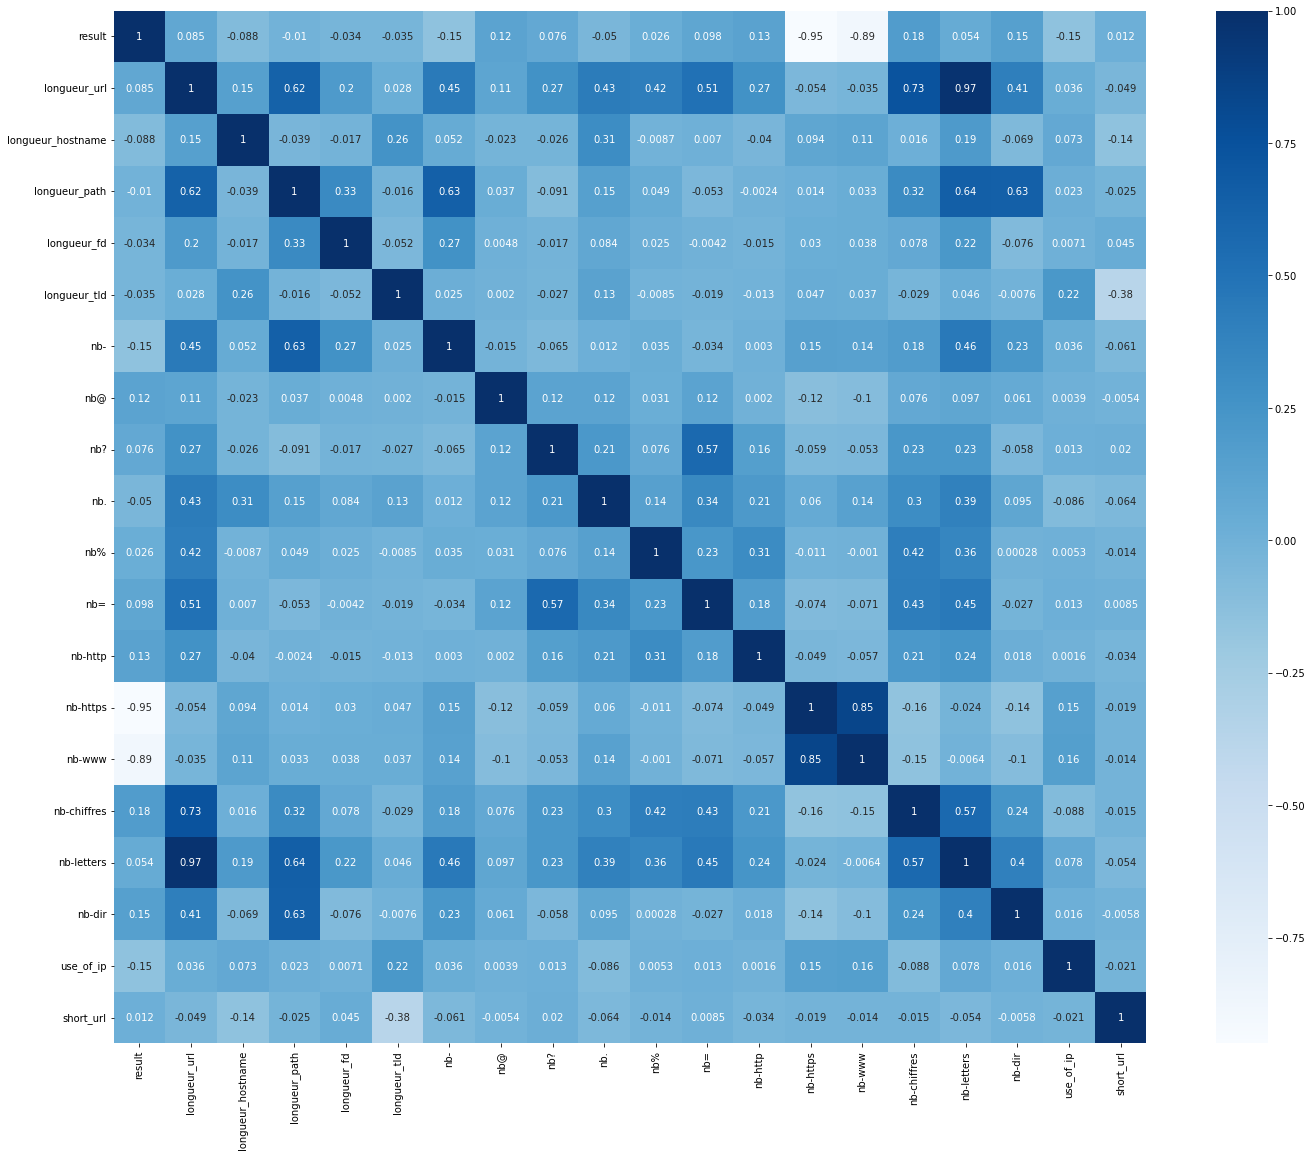

In [37]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10},  cmap="Blues")

***2-2/ noumbre d'URLs de chaque classe***

Text(0, 0.5, "Nombre d'URLs")

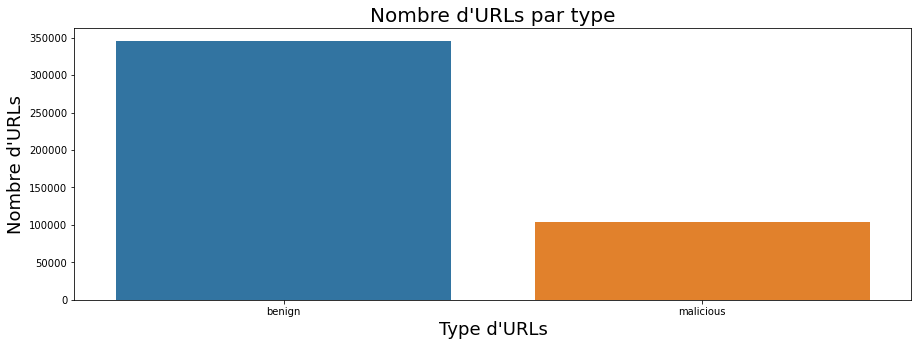

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Nombre d'URLs par type",fontsize=20)
plt.xlabel("Type d'URLs",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)

In [39]:
#pourcentage des URLs malvaillantes et non malveillantes
print("Pourcentage des URLs malveillantes:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Pourcentage des URLs non malveillantes:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Pourcentage des URLs malveillantes:23.20 %
Pourcentage des URLs non malveillantes:76.80 %


***2-3/ Autres graphes***

(0.0, 1000.0)

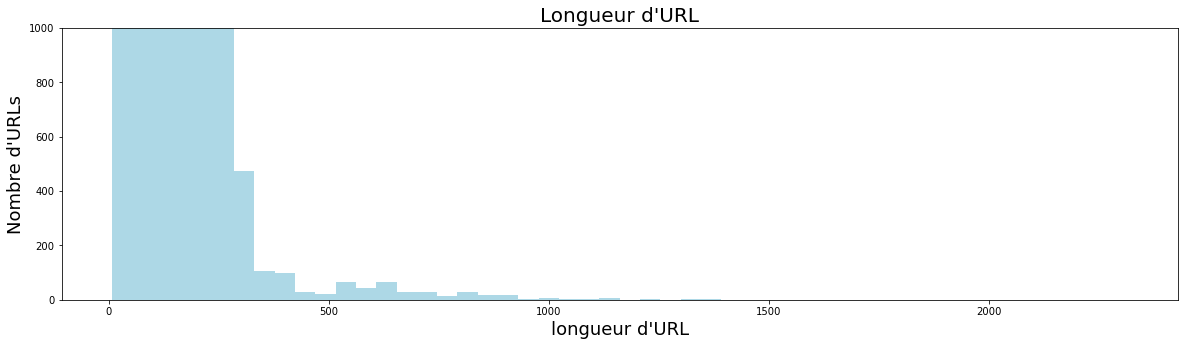

In [40]:
#longueurs d'URLs
plt.figure(figsize=(20,5))
plt.hist(df['longueur_url'],bins=50,color='LightBlue')
plt.title("Longueur d'URL",fontsize=20)
plt.xlabel("longueur d'URL",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

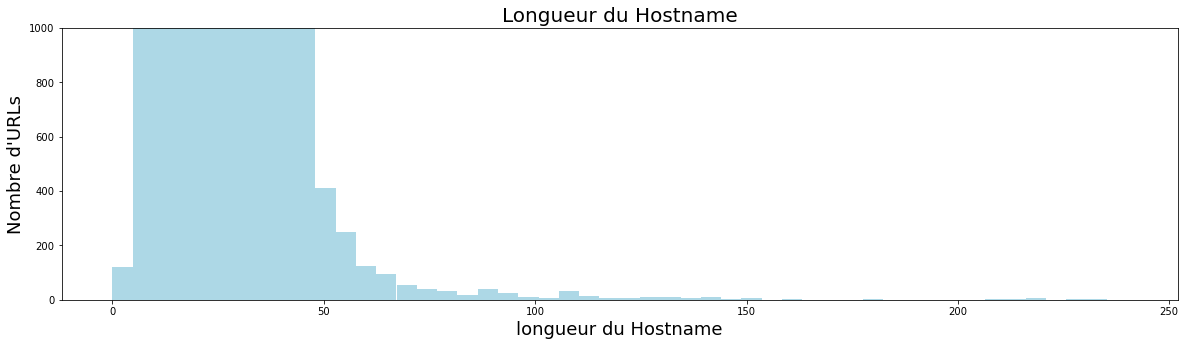

In [41]:
#longueurs de Hostname
plt.figure(figsize=(20,5))
plt.hist(df['longueur_hostname'],bins=50,color='LightBlue')
plt.title("Longueur du Hostname",fontsize=20)
plt.xlabel("longueur du Hostname",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

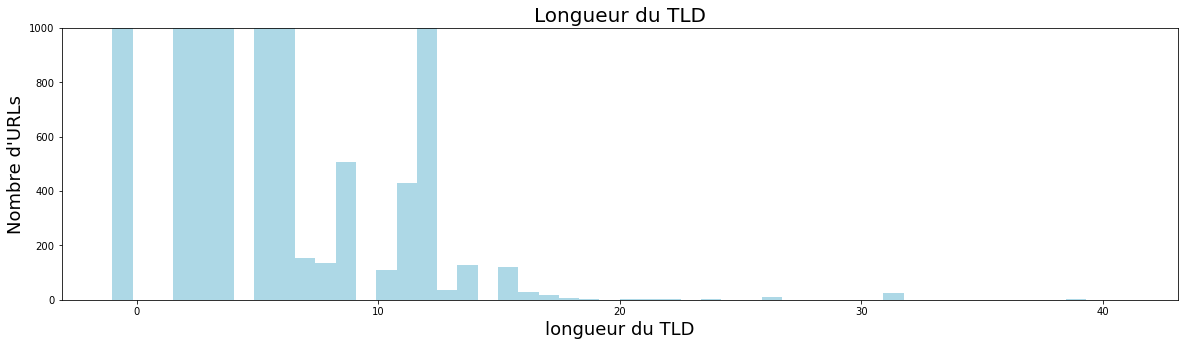

In [42]:
#Longueur du Top Level Domain
plt.figure(figsize=(20,5))
plt.hist(df['longueur_tld'],bins=50,color='LightBlue')
plt.title("Longueur du TLD",fontsize=20)
plt.xlabel("longueur du TLD",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, "Nombre d'URLs")

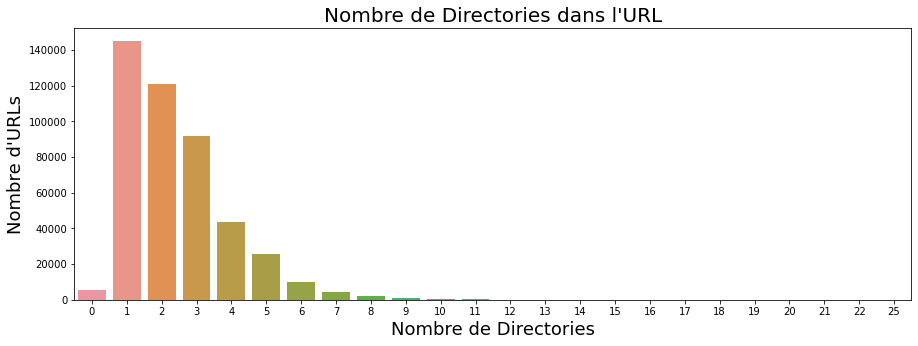

In [43]:
#Nombre de Directories
plt.figure(figsize=(15,5))
plt.title("Nombre de Directories dans l'URL",fontsize=20)
sns.countplot(x='nb-dir',data=df)
plt.xlabel("Nombre de Directories",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)

Text(0, 0.5, "Nombre d'URLs")

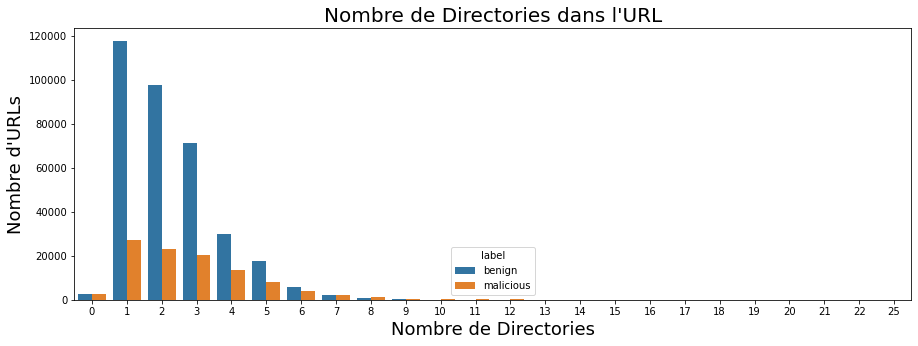

In [44]:
#Nombre de Directories par type d'URL (malveillante ou non)
plt.figure(figsize=(15,5))
plt.title("Nombre de Directories dans l'URL",fontsize=20)
sns.countplot(x='nb-dir',data=df,hue='label')
plt.xlabel("Nombre de Directories",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

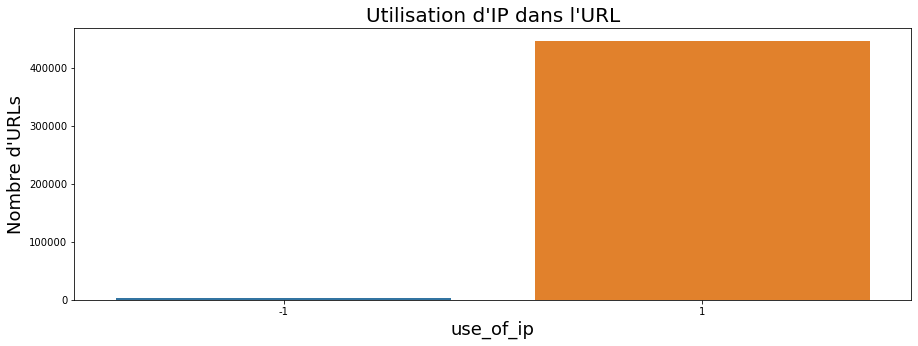

In [45]:
#Nombre des URLs qui utilisent IP
plt.figure(figsize=(15,5))
plt.title("Utilisation d'IP dans l'URL",fontsize=20)
plt.xlabel("nb d'utilisation d'IP",fontsize=18)
sns.countplot(df['use_of_ip'])
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

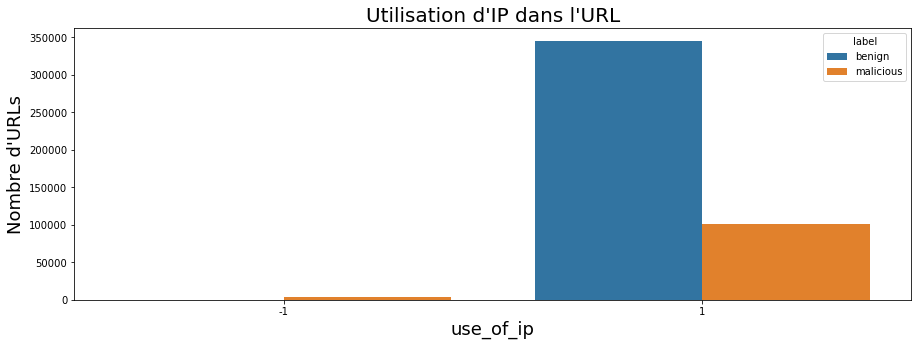

In [46]:
#Nombre des URLs qui utilisent IP par type d'URL (malveillante ou non)
plt.figure(figsize=(15,5))
plt.title("Utilisation d'IP dans l'URL",fontsize=20)
plt.xlabel("nb d'utilisation d'IP",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)
sns.countplot(df['use_of_ip'],hue='label',data=df)
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

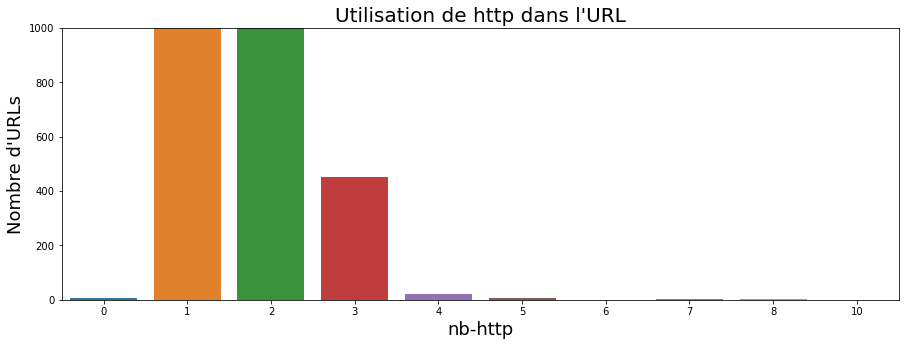

In [47]:
#Nombre des URLs ou il y a http
plt.figure(figsize=(15,5))
plt.title("Utilisation de http dans l'URL",fontsize=20)
plt.xlabel("nb d'utilisation de http",fontsize=18)
plt.ylim((0,1000))
sns.countplot(df['nb-http'])
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

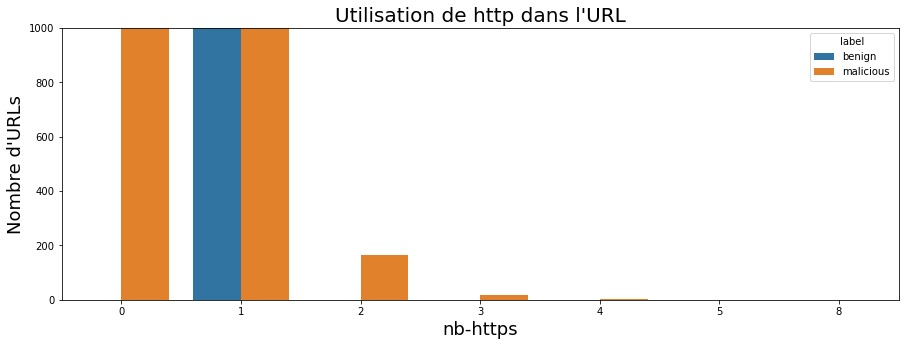

In [48]:
#Nombre des URLs ou il y a http par type d'URL (malveillante ou non)
plt.figure(figsize=(15,5))
plt.title("Utilisation de http dans l'URL",fontsize=20)
plt.xlabel("nb d'utilisation de http",fontsize=18)
plt.ylabel("Nombre d'URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(df['nb-https'],hue='label',data=df)
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

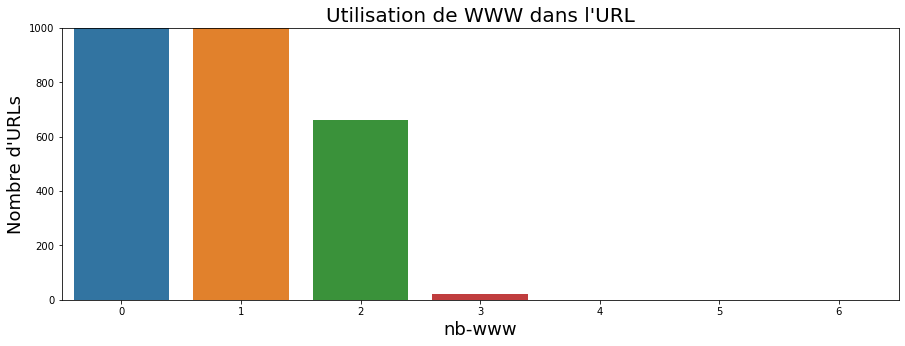

In [49]:
#Nombre d'URL ou il y a www
plt.figure(figsize=(15,5))
plt.title("Utilisation de WWW dans l'URL",fontsize=20)
plt.xlabel("nb d'tilisation de WWW",fontsize=18)
sns.countplot(df['nb-www'])
plt.ylim(0,1000)
plt.ylabel("Nombre d'URLs",fontsize=18)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, "Nombre d'URLs")

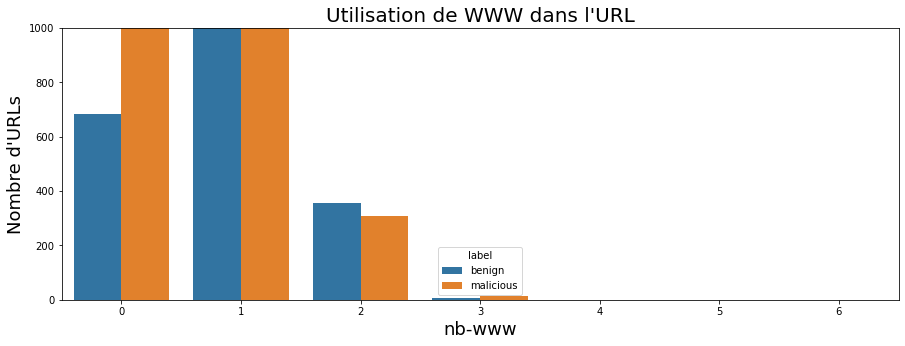

In [50]:
#Nombre d'URL ou il y a www par type d'URL (malveillante ou non)
plt.figure(figsize=(15,5))
plt.title("Utilisation de WWW dans l'URL",fontsize=20)
plt.xlabel("nb d'tilisation de WWW",fontsize=18)

sns.countplot(df['nb-www'],hue='label',data=df)
plt.ylim(0,1000)
plt.ylabel("Nombre d'URLs",fontsize=18)

In [51]:
df.shape

(450176, 22)

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   url                450176 non-null  object
 1   label              450176 non-null  object
 2   result             450176 non-null  int64 
 3   longueur_url       450176 non-null  int64 
 4   longueur_hostname  450176 non-null  int64 
 5   longueur_path      450176 non-null  int64 
 6   longueur_fd        450176 non-null  int64 
 7   longueur_tld       450176 non-null  int64 
 8   nb-                450176 non-null  int64 
 9   nb@                450176 non-null  int64 
 10  nb?                450176 non-null  int64 
 11  nb.                450176 non-null  int64 
 12  nb%                450176 non-null  int64 
 13  nb=                450176 non-null  int64 
 14  nb-http            450176 non-null  int64 
 15  nb-https           450176 non-null  int64 
 16  nb-www             4

<h2>3 - Split des données</h2>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [54]:
#les variables indépendantes
x = df[['longueur_hostname',
       'longueur_path', 'longueur_fd', 'nb-', 'nb@', 'nb?',
       'nb%', 'nb.', 'nb=', 'nb-http','nb-https', 'nb-www', 'nb-chiffres',
       'nb-letters', 'nb-dir', 'use_of_ip']]

#Variable Cible
y = df['result']

In [55]:
conda install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




In [56]:
!pip install imbalanced-learn


In [57]:
#pour traiter le déséquilibrage des données on utilise SMOTE
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 16)
Size of y-sample : (691476, 1)


In [58]:
#donnees d"entrainemet et donnees d'apprentisaage
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2) #20% test et 80% entrainement
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 16)
Shape of x_valid:  (138296, 16)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


<h2>4 - knn</h2>

In [121]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
from sys import version_info
#split to test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.6,stratify=y,random_state=42)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [62]:
#application de knn algo
knn = KNeighborsClassifier()
#apprentissage: # fit the model to our training data
knn.fit(x_train,y_train)
#test : # make predictions on the test set
pred=knn.predict(x_test)

#see if our modele is good : calculate the accuracy
score = knn.score(x_test,y_test)
print("score :",score,end="\n")

# taux d'erreur : calculate the error rate
error_rate = 1 - score
print("\n taux d'erreur :",error_rate)

score : 0.9559507083317136

 taux d'erreur : 0.04404929166828642


In [63]:
#evaluation :
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# calculate precision
precision = precision_score(y_test, pred,average="binary", pos_label='benign')
print("Precision:", precision)

# calculate recall
recall = recall_score(y_test, pred,average="binary", pos_label='benign')
print("Recall:", recall)

# calculate F1-score
f1 = f1_score(y_test, pred,average="binary", pos_label='benign')
print("F1-score:", f1)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion matrix:\n", conf_matrix)


#classification rapport
test_accuracy=list()
test_accuracy.append(score)
    
print("Test Accuracy: ", score*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))

print("\n", test_accuracy)


ValueError: pos_label=benign is not a valid label. It should be one of [0, 1]

<h2>5 - Arbre de decision</h2>

Les paramètres sont : 
<br>max_depth (la profondeur maximale de l'arbre, par défaut c'est non)
<br>min_samples_leaf (le nombre minimum d’échantillons requis pour se retrouver à un nœud de feuille, par défaut c'est 1)
<br>criterion (Représente la fonction de mesure de la qualité d’une scission. Il peut prendre soit le critère « gini » qui correspond à l’impureté de Gini soit «entropy» qui correspond au gain d’informations, par défaut c'est gini).


In [113]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [114]:
x__train, x__test, y__train, y__test = train_test_split(x, y, train_size=0.6, random_state=42)
print("Shape of x_train: ", x__train.shape)
print("Shape of x_valid: ", x__test.shape)
print("Shape of y_train: ", y__train.shape)
print("Shape of y_valid: ", y__test.shape)

Shape of x_train:  (270105, 16)
Shape of x_valid:  (180071, 16)
Shape of y_train:  (270105,)
Shape of y_valid:  (180071,)


In [115]:
dt_model = DecisionTreeClassifier()  #instanciation

dt_model.fit(x__train,y__train) #Apprentissage

DecisionTreeClassifier()

In [116]:
dt_predictions = dt_model.predict(x__test)
accuracy_score(y__test,dt_predictions) #calcul d'accuracy

0.9958238694737076

In [117]:
#la matrice de confusion
print(confusion_matrix(y__test,dt_predictions))

[[137774    356]
 [   396  41545]]


In [118]:
print(classification_report(y__test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138130
           1       0.99      0.99      0.99     41941

    accuracy                           1.00    180071
   macro avg       0.99      0.99      0.99    180071
weighted avg       1.00      1.00      1.00    180071



In [119]:
dt_predictions_tr = dt_model.predict(x__train)
print(classification_report(y__train, dt_predictions_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    207608
           1       1.00      1.00      1.00     62497

    accuracy                           1.00    270105
   macro avg       1.00      1.00      1.00    270105
weighted avg       1.00      1.00      1.00    270105



<h2>6 - Naive Bayes</h2>

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#train the model
clf=GaussianNB()
clf.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#evaluate the model

y_pred=clf.predict(x_test)


# calculate precision
precision = precision_score(y_test, pred,average="binary", pos_label='benign')
print("Precision:", precision)

# calculate recall
recall = recall_score(y_test, pred,average="binary", pos_label='benign')
print("Recall:", recall)

# calculate F1-score
f1 = f1_score(y_test, pred,average="binary", pos_label='benign')
print("F1-score:", f1)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion matrix:\n", conf_matrix)


#classification rapport
test_accuracy=list()
test_accuracy.append(score)
    
print("Test Accuracy: ", score*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))

print("\n", test_accuracy)

In [ ]:
#puisque var_smoothing et de l'ordre de 1e-9 on peut essayer dans un premiere temps pour les valeurs 2e-9,2.5e-9,3e-9,3.5e-9,4e-9,4.5e-9
for i in [2e-9,2.5e-9,3e-9,3.5e-9,4e-9,4.5e-9]:
    gnb=GaussianNB(var_smoothing=i)
    #fit the model
    gnb.fit(x_train,y_train)
    #predicting
    y_pred=gnb.predict(x_test)
    #calculate accuracy
    accuracy=gnb.score(x_test, y_test)
    confusion_M=confusion_matrix(y_test,y_pred)
    #or
    #accuracy=accuracy_score(y_pred, y_test)
    print('accuracy de', i ,'=', accuracy)
 

In [ ]:
#on a une meilleur accuracy pour var_smoothing=2e-09

In [ ]:
#dans un deuxieme temps on vas essayer pour des valeur comprisent entre 2e-9,4e-9
#dans ce cas le model utilise un split de type cross_validation
#avec nombre de folders est cv=5
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.linspace(2e-9,4e-9,1000)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x, y)
print('le best parameter est',gs_NB.best_params_)
print('le best score est', gs_NB.best_score_)
print(classification_report(y_test,y_pred))

In [ ]:
#on essay ce parametre avec le split aleatoire
Gauss_cls=GaussianNB(var_smoothing=3.203203203203203e-09)
Gauss_cls.fit(x_train,y_train)
y_pred=Gauss_cls.predict(x_test)
accuracy=Gauss_cls.score(x_test, y_test)
#confusion_M=confusion_matrix(y_test,y_pred)
print('accuracy: ', accuracy)

In [ ]:
# on utilise toujours un split de type cross_validation
#avec nombre de folders est cv=10
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.linspace(2e-9,4e-9,1000)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x, y)
print('le best parameter est',gs_NB.best_params_)
print('le best score est', gs_NB.best_score_)
print(classification_report(y_test,y_pred))

In [ ]:
#on essay ce parametre avec le split aleatoire
Gauss_cls=GaussianNB(var_smoothing=3.203203203203203e-09)
Gauss_cls.fit(x_train,y_train)
y_pred=Gauss_cls.predict(x_test)
accuracy=Gauss_cls.score(x_test, y_test)
#confusion_M=confusion_matrix(y_test,y_pred)
print('accuracy: ', accuracy)

<h2>7 - SVM</h2>

In [ ]:
#Import svm model
from sklearn.svm import SVC

In [ ]:
# on cree un objet svc
svc = SVC()

# phase d'apprentissage
svc.fit(x_train, y_train)

#prediction de données de test
y_pred = svc.predict(x_test)

#Calcul du précision
precision = precision_score(y_test, pred,average="binary", pos_label='benign')
print("Precision:", precision)

#Calcul du rappel
recall = recall_score(y_test, pred,average="binary", pos_label='benign')
print("Recall:", recall)

#Calcul du F1-score
f1 = f1_score(y_test, pred,average="binary", pos_label='benign')
print("F1-score:", f1)

#Calcul du matrice de confusion
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion matrix:\n", conf_matrix)


#classification rapport
test_accuracy=list()
test_accuracy.append(score)
    
print("Test Accuracy: ", score*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))

print("\n", test_accuracy)

In [ ]:
#tester sur l'argument kernel: 
#kernel precise la forme des hyperplans de separation;
from concurrent.futures import ThreadPoolExecutor # pour utiliser multitreading afin d'augmenter la vitesse d'execution
from sklearn.model_selection import GridSearchCV # pour chercher les arguments les plus presis



param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()

# utiliser 4 threads pour l'execution
executor = ThreadPoolExecutor(max_workers=4)

# utiliser les 4 workers(threads) pour executer gridsearch
future = executor.submit(GridSearchCV, svc, param_grid, scoring='accuracy', cv=5)

# prendre les resultats
grid_search = future.result()
grid_search.fit(x, y)

# afficher les meilleurs parametres 
print(grid_search.best_params_)

In [ ]:
# afficher l'accuracy_score pour chaque fitting
results = grid_search.cv_results_

for mts, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy: {:.10f} - Parameters: {}".format(mts, params))
    print(classification_report(y_test,y_pred))

In [ ]:
# nous avons decide de travailler avec kernel='rbf' a cause de la difficulte de trouver une separation liniere entre les variables endogenes et car il a la meme precision que kernel='poly'
#tester sur l'argument C :
#C est le paramètre de pénalité du terme d'erreur. Il contrôle le compromis entre la frontière de décision et la classification correcte des points d'apprentissage.


param_grid = {'kernel': ['rbf'], 'C' : [40,80,160,300,500,1000]}
svc = SVC()

# utiliser 4 threads pour l'execution
executor = ThreadPoolExecutor(max_workers=4)

# utiliser les 4 workers(threads) pour executer gridsearch
future = executor.submit(GridSearchCV, svc, param_grid, scoring='accuracy', cv=5)

# prendre les resultats
grid_search = future.result()
grid_search.fit(x, y)

# Print the best parameters
print(grid_search.best_params_)

In [ ]:
# afficher l'accuracy_score pour chaque fitting
results = grid_search.cv_results_

for mts, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy: {:.10f} - Parameters: {}".format(mts, params))
    print(classification_report(y_test,y_pred))

In [ ]:
#tester sur l'argument gamma :
#gamma est un paramètre pour les hyperplans non linéaires. Plus la valeur gamma est élevée, plus il essaie de s'adapter exactement à l'ensemble de données d'entraînement.
# nb : j'ai choisis a la fin de travailler avec gamma='scale' car les donnees ne sont pas centrees et reduites

param_grid = {'kernel': ['rbf'], 'C' : [40] , 'gamma' : ['scale','auto',100,400,1000]}
svc = SVC()

# utiliser 4 threads pour l'execution
executor = ThreadPoolExecutor(max_workers=4)

# utiliser les 4 workers(threads) pour executer gridsearch
future = executor.submit(GridSearchCV, svc, param_grid, scoring='accuracy', cv=5)

# prendre les resultats
grid_search = future.result()
grid_search.fit(x, y)

# Print the best parameters
print(grid_search.best_params_)

In [ ]:
results = grid_search.cv_results_

for mts,params in zip(results['mean_test_score'], results['params']):
    print("Accuracy: {:.100f} - Parameters: {}".format(mts, params))

Test et résultats des 2 meilleurs modèle trouvé :



In [ ]:
# creation d'object SVC
svc = SVC(kernel='rbf',C=40,gamma='scale')

# Fitting
svc.fit(x_train, y_train)

# predictions avec testing dataset
y_pred = svc.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.8f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
# Print the precision and recall
print(classification_report(y_test, y_pred))

In [ ]:
# creation d'object SVC
svc = SVC(gamma='scale',kernel='poly',degree=9,C=40)

# Fit the model to the training data
svc.fit(x_train, y_train)

# predictions avec testing dataset
y_pred = svc.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.8f}%".format(accuracy * 100))

In [ ]:
from sklearn.metrics import classification_report
# Print the precision and recall
print(classification_report(y_test, y_pred))

<h2>8 - K-means</h2>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Détermination de la valeur optimale de K
liste= []
for i in range(1, 9):
 model= KMeans(n_clusters = i, init = 'k-means++', random_state = 30)
 model.fit(X)
 # Ajout de la somme des carrés à liste
 liste.append(model.inertia_)

In [ ]:
# graphiquement
plt.plot(range(1, 9), liste, '-o')
plt.title('La méthode Elbow')
plt.xlabel('Nombre de classes')
plt.ylabel('Cout du modele')
plt.grid()
plt.show()

In [ ]:
#methode de ELBOW : k=2
#Application deKMeans
model = KMeans(n_clusters=2) 
model.fit(X) 
y_pred=model.predict(X)
model_labels=model.labels_
model.inertia_

In [ ]:
#evaluation :
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
#interne :

# calculate silhouette score
silhouette = silhouette_score(X, y_pred)
print("Silhouette score:", silhouette)

# calculate calinski harabasz score
calinski_harabasz = calinski_harabasz_score(X, y_pred)
print("Calinski harabasz score:", calinski_harabasz)

# calculate the Davies-Bouldin index
db = davies_bouldin_score(X, y_pred)
print("Davies-Bouldin Index:", db)


#externe :test using the true value (true label)
# calculate the adjusted Rand index 
ari = adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index:", ari)

# calculate the normalized mutual information 
nmi = normalized_mutual_info_score(y, y_pred)
print("Normalized Mutual Information:", nmi)

# calculate the Fowlkes-Mallows index 
fmi = fowlkes_mallows_score(y, y_pred)
print("Fowlkes-Mallows Index:", fmi)

In [ ]:
#taux d'erreur
# initialize the error rate to 0
error_rate = 0

# iterate over each data point
for i in range(len(X)):
    # if the data point is not in the correct cluster, increment the error rate
    if y_pred[i] != y[i]:
        error_rate += 1

# calculate the error rate as a percentage
error_rate = error_rate / len(X)
print("Taux d'erreur :",error_rate)

In [ ]:
#essayer de corriger l'errer 
#la modification des parametres de k means
from sklearn.cluster import KMeans
import numpy as np

# Initialize the model with k=3
kmeans_1 = KMeans(n_clusters=2, init='random', random_state=0)
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=0)

# Fit the model on the data
kmeans_1.fit(X)
kmeans_2.fit(X)

# Get the cluster assignments for each point
clusters_1 = kmeans_1.predict(X)
clusters_2 = kmeans_2.predict(X)

# Get the coordinates of the cluster centers
centroids_1 = kmeans_1.cluster_centers_
centroids_2 = kmeans_2.cluster_centers_

# Calculate the within-cluster sum of squares
error_1 = kmeans_1.inertia_
error_2 = kmeans_2.inertia_
print("Error rate with random initialization:", error_1)
print("Error rate with k-means++ initialization:", error_2)

In [ ]:
#essayer de trouver le bon k qui va donnees le bon score
list_score = []
for k in range(2, 9):
     model = KMeans(n_clusters = k).fit(X)
     labels = model.labels_
     list_score.append(silhouette_score(X, labels, metric = 'manhattan',sample_size=5000))

In [ ]:
# Graghiquement
plt.plot(range(2, 9), list_score, '-o')
plt.xlabel('Nombre de classes')
plt.ylabel('Score')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Set the parameters for DBSCAN
epsilon = 0.5
min_samples = 10

# Perform DBSCAN clustering
data = df.iloc[:, 3:20]
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(data)

# Extract labels for each point in the data
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
from sklearn.metrics import silhouette_score

# Get silhouette scores for different values of epsilon
eps_range = np.arange(0.1, 1, 0.1)
sil_scores = []
for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(df)
    labels = db.labels_
    sil_scores.append(silhouette_score(df, labels))

# Plot the silhouette scores
plt.plot(eps_range, sil_scores)
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Score")
plt.show()

<h2>9 - Clustering hiérarchique</h2>

<h2>10 - DBSCAN</h2>

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# choisir les paramètres de départ de DBSCAN
epsilon = 0.5
min_samples = 10

# réaliser le dbscan sur la data numérique, donc seulement les colonnes 3 à 19 inclus
data = df.iloc[:, 3:20]
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(data)

# extraire les labels
labels = db.labels_

# en ignorant les données bruitantes, on retrouve le nombre de clusters pertinents
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
from sklearn.metrics import silhouette_score

# Nous testons le score silhouette pour différentes valeurs de epsilon
eps_range = np.arange(0.1, 1, 0.1)
sil_scores = []
for eps in eps_range:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(data)
    labels = db.labels_
    sil_scores.append(silhouette_score(data, labels))

# Visualisation
plt.plot(eps_range, sil_scores)
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Score")
plt.show()

<h2>11 - MLP</h2>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

***Construction du modèle***
<br> Les paramètres sont : 
<ul>
  <li>le nombre de neurones</li>
  <li>la fontion d'activation</li>
  <li>le nombre de couches intermédiaires</li>

**Le modèle 1**

In [ ]:
#on commence par creer une instance du sequential()
model1 = Sequential()

#on définit maintenant les couches qu'on veut avoir dans notre modèle
model1.add(Dense(32, activation = 'relu', input_shape = (16, ))) #couche d'entrée
#des couches intermédiaire
model1.add(Dense(16, activation='relu'))
model1.add(Dense(8, activation='relu')) 
model1.add(Dense(1, activation='sigmoid')) #couche de sortie
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


***Compilation du modèle***
<br>on choisit la fontion d'erreur (pour diminuer l'erreur)
<br>l'optimiseur (pour obtenir des meilleures résultats pour la fonction du perte)
<br>La métrique (pour évaluer le modèle)

In [ ]:
#l'optimiseur Adam est une méthode de descente de gradient stochastique qui prend en paramètre : le learning rate, beta1, beta2, epsilon, amsgrad
#on a précisé juste le learning rate en 0.001 et on a leissé les autres paramètres par défaut
optimiseur1 = keras.optimizers.Adam(lr=0.0001) 
#la fonction de perte choisie ici est binary_crossentropy avec la métrique acc
model1.compile(optimizer= optimiseur1 ,loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


***Entrainement du modèle***

In [ ]:
checkpointer = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model1.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpointer])
#epochs : nombre d'itération 

Epoch 1/10
2154/2161 [============================>.] - ETA: 0s - loss: 0.4918 - acc: 0.7990
Epoch 1: val_acc improved from -inf to 0.96124, saving model to url.h5
2161/2161 [==============================] - 8s 3ms/step - loss: 0.4908 - acc: 0.7995 - val_loss: 0.1782 - val_acc: 0.9612
Epoch 2/10
2149/2161 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9829
Epoch 2: val_acc improved from 0.96124 to 0.99193, saving model to url.h5
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0833 - acc: 0.9829 - val_loss: 0.0432 - val_acc: 0.9919
Epoch 3/10
2152/2161 [============================>.] - ETA: 0s - loss: 0.0305 - acc: 0.9949
Epoch 3: val_acc improved from 0.99193 to 0.99522, saving model to url.h5
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0304 - acc: 0.9949 - val_loss: 0.0247 - val_acc: 0.9952
Epoch 4/10
2158/2161 [============================>.] - ETA: 0s - loss: 0.0210 - acc: 0.9962
Epoch 4: val_acc improved from 0.99522 t

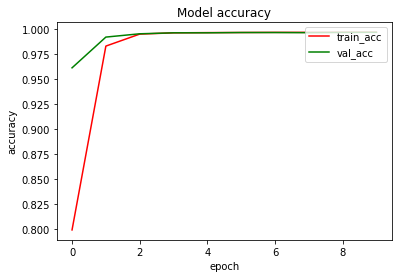

In [ ]:
# la variation de Accuracy durant l'apprentissage
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In Keras, val_acc is the accuracy of the model on the validation set, while train_acc is the accuracy of the model on the training set. The validation set is a portion of the data that is held out during training and is used to evaluate the performance of the model during training. The training set is used to fit the model's parameters. The difference between the training accuracy and validation accuracy can give an indication of how well the model is generalizing to new data, as a model with a high training accuracy but low validation accuracy is likely overfitting.

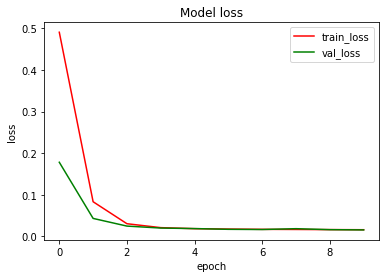

In [ ]:
# la variation de loss durant l'apprentissage
plt.plot(history.history['loss'], color ='red')
plt.plot(history.history['val_loss'], color ='green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

***Evaluation du modèle***

In [ ]:
# predicting on test data.
pred_test = model1.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

4322/4322 [==============================] - 6s 1ms/step


In [ ]:
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non malveillante")
        else:
            print("Malveillante")

In [ ]:
view_result(pred_test[:10])

Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
view_result(y_test[:10])

Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
score = model1.evaluate( x_test, y_test, verbose = 0)
print(score)

[0.01552372332662344, 0.9967027306556702]


**Le modèle 2**
<br>La différence par rapport au modèle 1 est qu'on va modifier le nombre de neurones dans les couches intermédiares


In [ ]:
model2 = Sequential()

model2.add(Dense(32, activation = 'relu', input_shape = (16, ))) 
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu')) 
model2.add(Dense(1, activation='sigmoid')) 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimiseur2= keras.optimizers.Adam(lr=0.0001)
model2.compile(optimizer= optimiseur2 ,loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpointer2 = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history2=model2.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpointer2])

Epoch 1/5
2159/2161 [============================>.] - ETA: 0s - loss: 0.3620 - acc: 0.8845
Epoch 1: val_acc improved from -inf to 0.98027, saving model to url.h5
2161/2161 [==============================] - 13s 5ms/step - loss: 0.3618 - acc: 0.8846 - val_loss: 0.0807 - val_acc: 0.9803
Epoch 2/5
2159/2161 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9913
Epoch 2: val_acc improved from 0.98027 to 0.99514, saving model to url.h5
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0465 - acc: 0.9913 - val_loss: 0.0281 - val_acc: 0.9951
Epoch 3/5
2154/2161 [============================>.] - ETA: 0s - loss: 0.0244 - acc: 0.9954
Epoch 3: val_acc improved from 0.99514 to 0.99627, saving model to url.h5
2161/2161 [==============================] - 6s 3ms/step - loss: 0.0245 - acc: 0.9954 - val_loss: 0.0198 - val_acc: 0.9963
Epoch 4/5
2155/2161 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9960
Epoch 4: val_acc improved from 0.99627 to 0

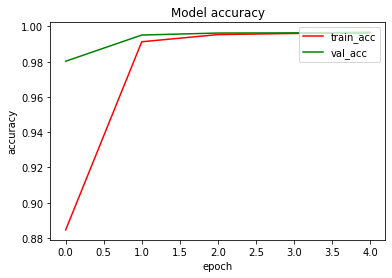

In [ ]:
# la variation de Accuracy durant l'apprentissage
plt.plot(history2.history['acc'], color='red')
plt.plot(history2.history['val_acc'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

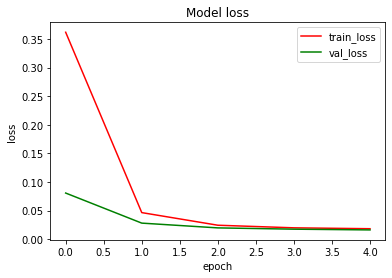

In [ ]:
# la variation de loss durant l'apprentissage
plt.plot(history2.history['loss'], color ='red')
plt.plot(history2.history['val_loss'], color ='green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# predicting on test data.
pred_test2 = model2.predict(x_test)
for i in range (len(pred_test2)):
    if (pred_test2[i] < 0.5):
        pred_test2[i] = 0
    else:
        pred_test2[i] = 1
pred_test2 = pred_test2.astype(int)

4322/4322 [==============================] - 6s 1ms/step


In [ ]:
view_result(pred_test2[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
view_result(y_test[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
score2 = model2.evaluate( x_test, y_test, verbose = 0)
print(score2)

[0.01626245118677616, 0.9967244267463684]


**Le modèle 3**
<br>On va changer les fonctions d'activation


In [ ]:
model3 = Sequential()

model3.add(Dense(32, activation = 'sigmoid', input_shape = (16, ))) 
model3.add(Dense(16, activation='sigmoid'))
model3.add(Dense(8, activation='sigmoid')) 
model3.add(Dense(1, activation='relu')) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimiseur3= keras.optimizers.Adam(lr=0.0001)
model3.compile(optimizer= optimiseur3 ,loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpointer3 = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history3=model3.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpointer3])

Epoch 1/5
2153/2161 [============================>.] - ETA: 0s - loss: 0.6070 - acc: 0.6878
Epoch 1: val_acc improved from -inf to 0.89450, saving model to url.h5
2161/2161 [==============================] - 6s 3ms/step - loss: 0.6061 - acc: 0.6885 - val_loss: 0.3688 - val_acc: 0.8945
Epoch 2/5
2148/2161 [============================>.] - ETA: 0s - loss: 0.1782 - acc: 0.9465
Epoch 2: val_acc improved from 0.89450 to 0.97661, saving model to url.h5
2161/2161 [==============================] - 6s 3ms/step - loss: 0.1777 - acc: 0.9467 - val_loss: 0.0850 - val_acc: 0.9766
Epoch 3/5
2151/2161 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9862
Epoch 3: val_acc improved from 0.97661 to 0.99124, saving model to url.h5
2161/2161 [==============================] - 6s 3ms/step - loss: 0.0674 - acc: 0.9862 - val_loss: 0.0529 - val_acc: 0.9912
Epoch 4/5
2146/2161 [============================>.] - ETA: 0s - loss: 0.0508 - acc: 0.9914
Epoch 4: val_acc improved from 0.99124 to 0.

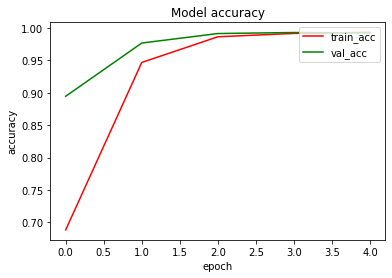

In [ ]:
# la variation de Accuracy durant l'apprentissage
plt.plot(history3.history['acc'], color='red')
plt.plot(history3.history['val_acc'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

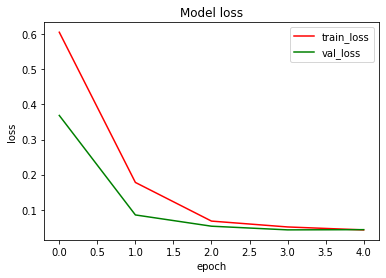

In [ ]:
# la variation de loss durant l'apprentissage
plt.plot(history3.history['loss'], color ='red')
plt.plot(history3.history['val_loss'], color ='green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# predicting on test data.
pred_test3 = model3.predict(x_test)
for i in range (len(pred_test3)):
    if (pred_test3[i] < 0.5):
        pred_test3[i] = 0
    else:
        pred_test3[i] = 1
pred_test3 = pred_test3.astype(int)

4322/4322 [==============================] - 6s 1ms/step


In [ ]:
view_result(pred_test3[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
view_result(y_test[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
score3 = model3.evaluate( x_test, y_test, verbose = 0)
print(score3)

[0.043009042739868164, 0.9922702312469482]


**Le modèle 4**
<br> On va ajouter de couches intermédiaires


In [ ]:
model4 = Sequential()

model4.add(Dense(32, activation = 'relu', input_shape = (16, ))) 
model4.add(Dense(16, activation='relu'))
model4.add(Dense(8, activation='relu')) 
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='sigmoid'))
model4.add(Dense(1, activation='sigmoid')) 
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,897
Trainable params: 3,897
Non-traina

In [ ]:
optimiseur4= keras.optimizers.Adam(lr=0.0001)
model4.compile(optimizer= optimiseur4 ,loss='binary_crossentropy',metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpointer4 = ModelCheckpoint('url.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history4=model4.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpointer4])

Epoch 1/5
2148/2161 [============================>.] - ETA: 0s - loss: 0.2275 - acc: 0.9100
Epoch 1: val_acc improved from -inf to 0.99466, saving model to url.h5
2161/2161 [==============================] - 8s 4ms/step - loss: 0.2263 - acc: 0.9105 - val_loss: 0.0303 - val_acc: 0.9947
Epoch 2/5
2159/2161 [============================>.] - ETA: 0s - loss: 0.0239 - acc: 0.9952
Epoch 2: val_acc improved from 0.99466 to 0.99638, saving model to url.h5
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0239 - acc: 0.9952 - val_loss: 0.0180 - val_acc: 0.9964
Epoch 3/5
2148/2161 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9959
Epoch 3: val_acc improved from 0.99638 to 0.99664, saving model to url.h5
2161/2161 [==============================] - 7s 3ms/step - loss: 0.0186 - acc: 0.9960 - val_loss: 0.0160 - val_acc: 0.9966
Epoch 4/5
2149/2161 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9963
Epoch 4: val_acc did not improve from 0.9966

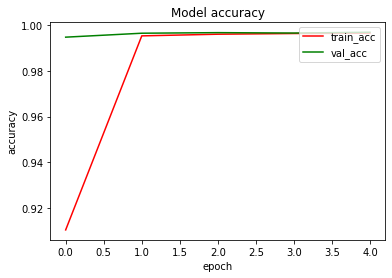

In [ ]:
# la variation de Accuracy durant l'apprentissage
plt.plot(history4.history['acc'], color='red')
plt.plot(history4.history['val_acc'], color='green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

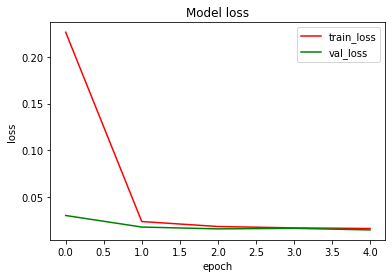

In [ ]:
# la variation de loss durant l'apprentissage
plt.plot(history4.history['loss'], color ='red')
plt.plot(history4.history['val_loss'], color ='green')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# predicting on test data.
pred_test4 = model4.predict(x_test)
for i in range (len(pred_test4)):
    if (pred_test4[i] < 0.5):
        pred_test4[i] = 0
    else:
        pred_test4[i] = 1
pred_test4 = pred_test4.astype(int)

4322/4322 [==============================] - 6s 1ms/step


In [ ]:
view_result(pred_test4[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
view_result(y_test[:10])

Non malveillante
Non malveillante
Non malveillante
Malveillante
Non malveillante
Non malveillante
Non malveillante
Malveillante
Malveillante
Malveillante


In [ ]:
score4 = model4.evaluate( x_test, y_test, verbose = 0)
print(score4)

[0.01491992361843586, 0.9968112111091614]
